<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png" style="width: 600px;"/> 
</center>

<div align="center">
    <span style="font-family:Arial Black;font-size:25px;color:darkblue">
        Programmation orientée objet sous Python
    </span>
</div>
<br>
<div align="center">
    <span style="font-family:Arial Black;font-size:20px;color:black">
        Framework de Backtesting de Stratégies d’Investissement
    </span>
</div>
<br>
<br>
<div align="center">
    <span style="font-family:Arial Black;font-size:15px">
        Master 272 - Ingénierie Economique et Financière
    </span>
</div>
<br>
<div align="center">
    <span style="font-family:Arial Black;font-size:14px">
        Par BOUSSAID Nassim, COUTURAUD Nicolas, MOUROUGAYA Kartty et SOULIER Hugo sous la direction de M. Remi Genet
    </span>
</div>


_Backtesting-Framework.py_ Guide utilisateur
=======================

# Introduction et objectif

Dans ce notebook, nous allons utiliser un framework de backtesting d'investissement que nous avons conçu pour analyser et évaluer différentes stratégies financières. 

Ce framework se distingue par sa flexibilité et son extensibilité, permettant de tester des stratégies personnalisées sur des données historiques. Voici un aperçu de ses fonctionnalités principales :

- **Gestion des données** : Le framework accepte des données au format CSV ou Parquet, ou directement sous forme de DataFrame pandas. Cela permet une intégration facile avec des jeux de données financiers divers, comme des actions, des crypto-monnaies ou d'autres actifs.
- **Stratégies d'investissement** : Les utilisateurs peuvent définir des stratégies via une classe abstraite avec des méthodes pour générer des positions ou, pour des cas simples, utiliser un décorateur. Cela simplifie le développement de nouvelles stratégies.
- **Backtesting performant** : Une classe centrale gère l'exécution des stratégies sur les données historiques, avec la possibilité d'inclure des coûts de transaction, du slippage et des ajustements basés sur la volatilité cible.
- **Analyse des résultats** : Une classe dédiée fournit des statistiques détaillées sur les performances, telles que le rendement total, le ratio de Sharpe, le drawdown maximum, le nombre de trades et le pourcentage de trades gagnants.
- **Visualisation avancée** : Le framework inclut des options de visualisation basées sur matplotlib, seaborn ou plotly, permettant de produire des graphiques clairs et interactifs pour mieux comprendre les résultats.
- **Comparaison de stratégies** : Une fonction intégrée permet de comparer les performances de plusieurs stratégies, facilitant l'identification des approches les plus efficaces.

L'objectif de ce notebook est de démontrer comment utiliser ce framework pour tester, analyser et visualiser les performances de stratégies financières sur des données historiques. Nous présenterons les principales fonctionnalités et fournirons des exemples concrets pour exploiter cet outil de manière optimale.

# Gestion des données
Notre framework est conçu pour accepter plusieurs formats de données en entrée afin de permettre une flexibilité maximale pour les utilisateurs travaillant avec des données financières. Voici les options disponibles :

1. **Fichiers CSV** :
   - Le framework peut charger des données au format CSV en utilisant la méthode `load_data`.
   - Ces fichiers doivent contenir des colonnes adaptées, comme `Date` et `Close`, pour permettre un traitement fluide.


2. **Fichiers Parquet** :
   - Les utilisateurs peuvent également fournir des fichiers au format Parquet, qui est plus performant pour les grands ensembles de données.


3. **DataFrames pandas** :
   - Si les données sont déjà chargées dans un DataFrame pandas, le framework les accepte directement sans nécessiter de conversion.


4. **Sources de données externes** :
   - Les utilisateurs peuvent importer des données de bibliothèques tierces comme `yfinance`, `pandas-datareader`, ou d'autres API de données financières.
   - Ces données peuvent être facilement transformées en DataFrames pandas avant d'être passées au framework.


#### Format des Données

- **Index** : Les données doivent être indexées par des dates au format `datetime`. Cela permet de travailler avec des fréquences temporelles cohérentes (quotidiennes, hebdomadaires, mensuelles, etc.).
- **Colonnes** : Les colonnes des données contiennent généralement des prix financiers, comme :
  - `Open` (prix d'ouverture)
  - `Close` (prix de clôture)
  - ...
  
  Cependant, le framework est suffisamment flexible pour accepter d'autres types de colonnes selon les stratégies utilisées. Par exemple, les colonnes peuvent inclure des indicateurs financiers tels que :
  - **Price-to-Earnings Ratio (PER)**
  - **Price-to-Book Ratio (PBR)**
  - **Return on Equity (ROE)**
  - **Beta**
  
  Cela permet aux utilisateurs de tester des stratégies plus avancées basées sur des indicateurs fondamentaux ou des signaux spécifiques.

#### Exemple de Code

La méthode suivante montre comment le framework gère différents formats de données :

```python
def load_data(data_source):
    """
    Charge les données d'un fichier CSV, Parquet ou directement d'un DataFrame pandas.
    """
    if isinstance(data_source, pd.DataFrame):
        return data_source
    elif isinstance(data_source, str):
        if data_source.endswith('.csv'):
            return pd.read_csv(data_source, index_col=0, parse_dates=True)
        elif data_source.endswith('.parquet'):
            return pd.read_parquet(data_source)
    raise ValueError("Le format de données n'est pas supporté. "
                     "Veuillez fournir un DataFrame ou un fichier CSV/Parquet.")


#### Exemple utilisé dans ce notebook :
Pour cet exemple, nous allons utiliser le fichier `S&P500_PX_LAST_EXAMPLE.csv` fourni dans le dépôt GitHub. Ce fichier contient les **prix de clôture quotidiens** de 10 titres du S&P 500 entre début 2017 et fin 2018. Les données sont déjà formatées de manière adéquate, avec une colonne `Date` en index et une colonne `Close` représentant les prix de clôture.

Voici un aperçu des données que nous allons charger :

In [1]:
import pandas as pd
# Exemple de chargement des données
data_path = "C:/Users/nnayr/Documents/M2 EIF/S1/Backtesting-Framework/backtesting_framework/Datasets/S&P500_PX_LAST_EXAMPLE.csv"
historical_data = pd.read_csv(data_path, index_col=0, parse_dates=True)
print(historical_data.head())

            A UN Equity  AAL UW Equity  AAP UN Equity  AAPL UW Equity  \
Dates                                                                   
2017-01-02        45.56          46.69         169.12          28.955   
2017-01-03        46.49          46.30         170.60          29.038   
2017-01-04        47.10          46.70         172.00          29.005   
2017-01-05        46.54          45.89         171.88          29.153   
2017-01-06        47.99          46.21         169.63          29.478   

            ABBV UN Equity  ABC UN Equity  ABT UN Equity  ACGL UW Equity  \
Dates                                                                      
2017-01-02           62.62          78.19          38.41         28.7633   
2017-01-03           62.41          82.61          39.05         28.6300   
2017-01-04           63.29          84.66          39.36         28.8333   
2017-01-05           63.77          83.68          39.70         28.5400   
2017-01-06           63.79      

# Stratégie

Les stratégies dans notre framework dérivent toutes de la classe abstraite `Strategy`, qui définit la structure de base d'une stratégie. Cette classe inclut :

- **Méthode obligatoire** :
  - `get_position(historical_data, current_position)` : Cette méthode doit être implémentée pour calculer la position à prendre (long, short, ou neutre) sur la base des données historiques et de la position actuelle.

- **Méthode optionnelle** :
  - `fit(data)` : Une méthode permettant de prétraiter ou d'ajuster les données si nécessaire. Par défaut, cette méthode ne fait rien si elle n'est pas surchargée.

- **Attribut clé** :
  - `multi_asset` (booléen) : Indique si la stratégie est multi-actifs (gestion de plusieurs actifs en même temps) ou mono-actif (un seul actif).

#### Exemple : Stratégie de Moyenne Mobile

Pour illustrer le fonctionnement, nous implémentons une stratégie simple de "moyenne mobile". Cette stratégie suit les règles suivantes :
- **Position Long (1)** : Lorsque la moyenne mobile courte dépasse la moyenne mobile longue.
- **Position Short (-1)** : Lorsque la moyenne mobile courte passe en dessous de la moyenne mobile longue.
- **Position Hold (current_position)** : Dans les cas restants

Voici l'implémentation de la stratégie :

In [2]:
from backtesting_framework.Core.Strategy import Strategy
import pandas as pd

class MovingAverage(Strategy):
    def __init__(self, short_window: int, long_window: int):
        """
        Une stratégie de moyenne mobile qui passe en position longue si la MA courte dépasse la MA longue, sinon position courte.

        Paramètres :
        -----------
        short_window : int
            Nombre de périodes pour la moyenne mobile courte.
        long_window : int
            Nombre de périodes pour la moyenne mobile longue.
        """
        super().__init__(multi_asset=False)
        self.short_window = short_window
        self.long_window = long_window

    def get_position(self, historical_data: pd.DataFrame, current_position: float) -> float:
        """
        Détermine la position à prendre en fonction des moyennes mobiles.

        Paramètres :
        -----------
        historical_data : pd.DataFrame
            Données historiques de prix, incluant la journée actuelle.
        current_position : float
            Position actuelle (1 pour long, -1 pour short, 0 pour neutre).

        Retourne :
        --------
        float
            Nouvelle position (-1, 0, ou 1) basée sur la logique de la stratégie.
        """
        if len(historical_data) < max(self.short_window, self.long_window):
            # Pas assez de données pour calculer les signaux
            return current_position

        prices = historical_data.values
        ma_short = self._calculate_sma(prices, self.short_window)
        ma_long = self._calculate_sma(prices, self.long_window)

        if ma_short > ma_long:
            return 1
        elif ma_short < ma_long:
            return -1
        else:
            return current_position

    def _calculate_sma(self, prices, window: int) -> float:
        """
        Calcule la moyenne mobile simple (SMA).

        Paramètres :
        -----------
        prices : array-like
            Tableau de prix.
        window : int
            Nombre de périodes pour la SMA.

        Retourne :
        --------
        float
            La moyenne mobile simple calculée sur les dernières `window` périodes.
        """
        relevant_prices = prices[-window:]
        return relevant_prices.sum() / window

    def fit(self, data):
        """
        Méthode optionnelle pour ajuster ou prétraiter les données. Non utilisée dans cette stratégie.
        """
        pass

### Stratégies Disponibles

Notre framework fournit plusieurs stratégies prédéfinies que les utilisateurs peuvent directement utiliser ou personnaliser. Ces stratégies permettent de couvrir un large éventail d'approches d'investissement, allant des analyses techniques aux méthodes basées sur des indicateurs fondamentaux.

#### Liste des stratégies incluses :
1. **Moving Average (MA)** : Une stratégie de moyenne mobile basée sur le croisement de moyennes mobiles courtes et longues pour générer des signaux de trading.
2. **Bollinger Bands** : Une stratégie utilisant les bandes de Bollinger pour identifier des opportunités d'achat ou de vente basées sur la volatilité.
3. **RSI (Relative Strength Index)** : Une stratégie utilisant l'indicateur RSI pour détecter les conditions de surachat ou de survente.
4. **Mean Reversion** : Une stratégie basée sur l'idée que les prix ont tendance à revenir à leur moyenne historique.
5. **Keltner Channel** : Une stratégie utilisant les canaux de Keltner pour identifier des ruptures ou des retours à la moyenne.
6. **Volatility Trend** : Une stratégie exploitant les tendances de volatilité pour ajuster les positions.
7. **Pairs Trading** : Une stratégie d'arbitrage statistique entre deux actifs corrélés.
8. **Quality** : Une stratégie basée sur des indicateurs fondamentaux comme le rendement du capital ou la stabilité des bénéfices.
9. **Size** : Une stratégie ciblant des actifs en fonction de leur taille (capitalisation boursière).
10. **Value** : Une stratégie axée sur des actifs sous-évalués selon des indicateurs fondamentaux comme le ratio Price-to-Earnings (PER).
11. **Min Variance** : Une approche pour minimiser le risque global du portefeuille en fonction de la variance des actifs.
12. **Buy-and-Hold** : Une stratégie simple consistant à acheter un actif au début et à le conserver jusqu'à la fin.

#### Utilisation des stratégies prédéfinies
Chaque stratégie est implémentée sous forme de classe dérivée de la classe abstraite `Strategy`. Vous pouvez facilement instancier et tester ces stratégies en fournissant les paramètres nécessaires, comme les fenêtres de calcul pour une moyenne mobile ou les seuils pour le RSI.

#### Exemple d'utilisation d'une stratégie prédéfinie :
```python
from backtesting_framework.Strategies.MovingAverage import MovingAverage

# Exemple : Stratégie Moving Average avec une fenêtre courte de 20 jours et longue de 50 jours
strategy = MovingAverage(short_window=20, long_window=50, exponential_mode=False)


# Backtester

L'objet `Backtester` est le composant central de notre framework. Il permet de tester les stratégies d'investissement sur des données historiques et fournit une analyse détaillée des performances.

#### Paramètres d'entrée (`__init__`)
Lors de l'initialisation, le `Backtester` prend en entrée plusieurs paramètres :
- **`data_source`** : Les données historiques à utiliser, au format CSV, Parquet ou DataFrame.
- **`weight_scheme`** : Le schéma de pondération des actifs, par exemple, "EqualWeight" (poids égal) ou "MarketCapWeight" (pondération par capitalisation boursière).
- **`market_cap_source`** *(optionnel)* : Les données de capitalisation boursière, nécessaires si le schéma de pondération est "MarketCapWeight".
- **`special_start`** : L'indice à partir duquel le backtest commence (pour ignorer un historique initial, par défaut : 1).
- **`transaction_cost`** : Les coûts de transaction (par défaut : 0.0).
- **`slippage`** : Les coûts de slippage liés à l'exécution des ordres (par défaut : 0.0).
- **`risk_free_rate`** : Le taux sans risque utilisé pour calculer des métriques comme le ratio de Sharpe (par défaut : 0.0).
- **`rebalancing_frequency`** : La fréquence de rebalancement des positions (par exemple, "daily", "monthly" ou "weekly").
- **`plot_library`** : La bibliothèque utilisée pour les graphiques (par défaut : "matplotlib").

#### Méthode principale : `run`
La méthode `run` exécute la stratégie sur les données fournies et renvoie un objet `Result` contenant les résultats du backtest.

- **Entrée** : 
  - Une instance d'une stratégie dérivée de la classe `Strategy`.
  - Optionnellement, des paramètres pour le "Volatility Targeting".
  
- **Sortie** : 
  - Un objet `Result` contenant :
    - Les rendements du portefeuille.
    - Les rendements cumulés.
    - Les statistiques de performance (ratio de Sharpe, drawdown, etc.).
    - Les visualisations, comme les rendements cumulés et les heatmaps.

---

#### Exemple d'utilisation

Pour illustrer, testons notre stratégie de "Moving Average" sur des données historiques. Voici un exemple :

In [3]:
# Importation des modules nécessaires
from backtesting_framework.Core.Backtester import Backtester

# Initialisation du Backtester
backtester = Backtester(
    data_source=historical_data,
    transaction_cost=0,
    slippage=0,
    rebalancing_frequency="monthly",
    plot_librairy="seaborn"
)

# Définition de la stratégie Moving Average
moving_average_strategy = MovingAverage(short_window=20, long_window=50)

# Exécution du backtest pour Moving Average
moving_average_result = backtester.run(moving_average_strategy)

## Analyse des Résultats et Visualisations

Une fois que le backtest de la stratégie est exécuté, il est important d'analyser les performances de manière quantitative et visuelle. Notre framework permet d'obtenir des statistiques détaillées et des graphiques intuitifs pour faciliter cette analyse.

### Statistiques de la Stratégie
Les statistiques incluent des métriques telles que :
- **Rendement total et annualisé** : Indiquent les performances absolues de la stratégie.
- **Volatilité** : Mesure le risque de la stratégie.
- **Ratio de Sharpe et de Sortino** : Évaluent les rendements ajustés au risque.
- **Drawdown maximum et temps de récupération** : Révèlent les pertes maximales subies.
- **VaR (Value at Risk)** et **Expected Shortfall (ES)** : Fournissent une mesure des pertes potentielles.

### Visualisations Disponibles
- **Graphique des rendements cumulés** : Trace l'évolution des rendements cumulés au fil du temps.
- **Heatmap des rendements mensuels** : Montre les rendements pour chaque mois sous forme de tableau coloré.
- **Distribution des rendements journaliers** : Un histogramme visualise la répartition des rendements quotidiens.
- **Comparaison avec d'autres stratégies** : Comparez les performances de plusieurs stratégies pour en identifier les points forts.

In [4]:
# Affichage des statistiques de la stratégie
moving_average_result.display_statistics()


Statistiques de Performance :
------------------------------
Rendement Total : 11.74%
Rendement Annualisé : 3.92%
Volatilité : 9.93%
Sharpe Ratio : 0.5902
Drawdown Maximum : -9.48%
Temps de Récupération (jours) : 18
Sortino Ratio : 0.4780
Calmar Ratio : 0.4133
Skewness : -0.4145
Kurtosis (excess) : 4.5202
Total Trades : 77
Winning Trades : 30
Win Rate : 38.96%
VaR (95%) : -0.86%
Expected Shortfall (95%) : -1.55%


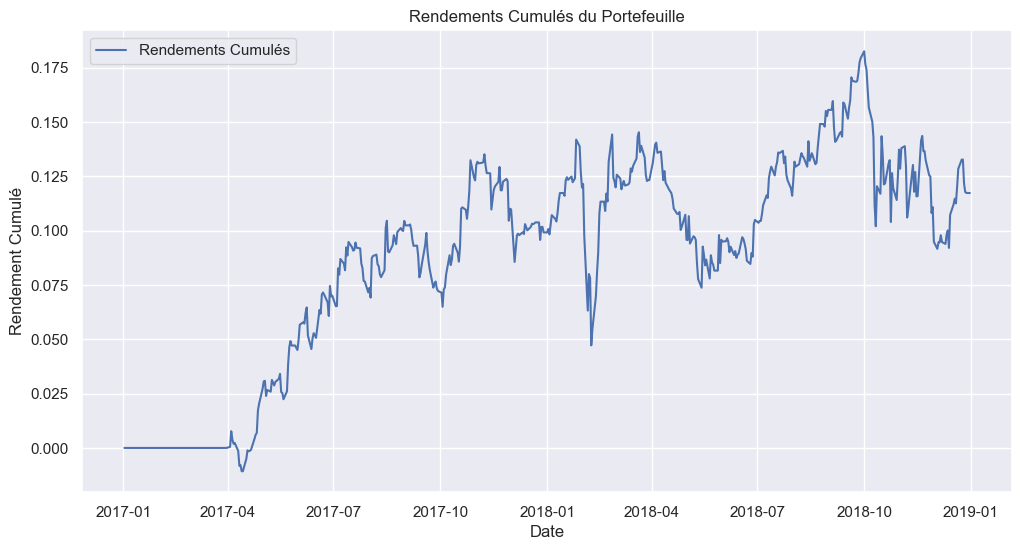

In [5]:
# Graphique des rendements cumulés
moving_average_result.plot_cumulative_returns()

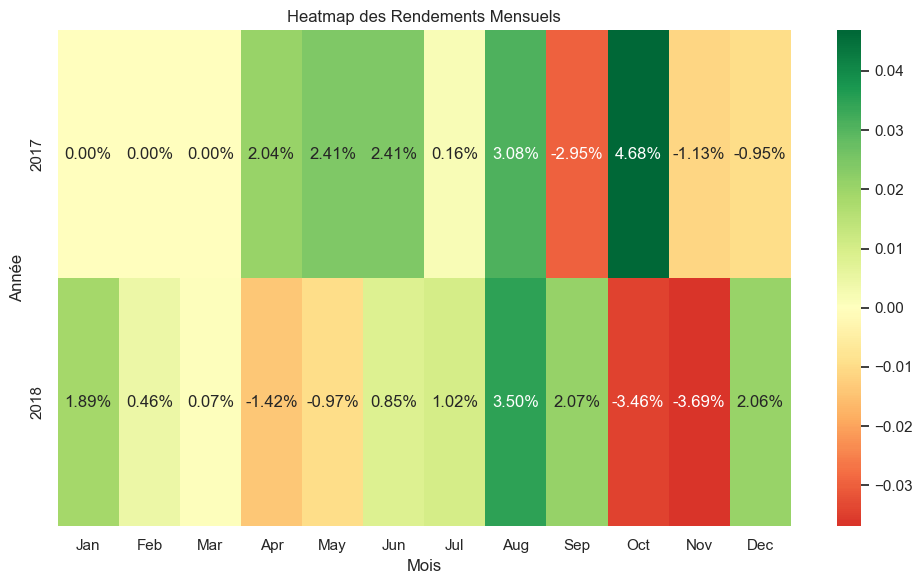

In [6]:
# Heatmap des rendements mensuels
moving_average_result.plot_monthly_returns_heatmap()

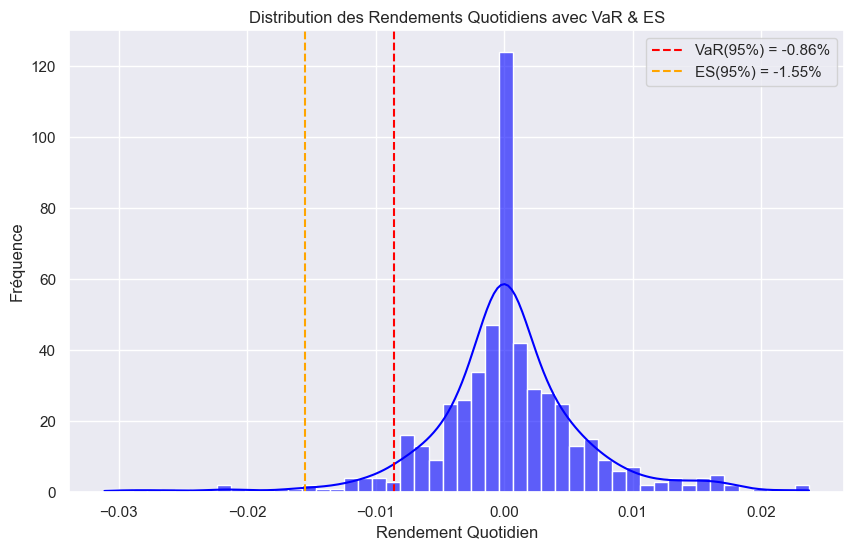

In [10]:
# Distribution des rendements journaliers
moving_average_result.plot_returns_distribution()

## Comparaison entre stratégies

Le framework de backtesting que nous utilisons offre la possibilité de comparer les performances de plusieurs stratégies. Cette fonctionnalité est essentielle pour évaluer les forces et les faiblesses de différentes approches et pour sélectionner la stratégie la plus adaptée à un contexte donné.

Dans cet exemple, nous allons comparer une stratégie de moyenne mobile (`Moving Average`) à une stratégie `Buy-and-Hold`. La stratégie `Buy-and-Hold` consiste à acheter un actif au début de la période d'investissement et à le conserver jusqu'à la fin, sans effectuer de transactions supplémentaires.


Comparaison de stratégies
------------------------------------------
      Strategy  Total Return  Annualized Return  Volatility  Sharpe Ratio  Max Drawdown  Max DD Recovery (days)  Sortino Ratio  Calmar Ratio  Skewness  Kurtosis  Win Rate   VaR(5%)    ES(5%)
Moving Average      0.117376           0.039165    0.099308      0.590246     -0.094763                    18.0       0.477977      0.413290 -0.414461  4.520173   0.38961 -0.008567 -0.015533
  Buy-and-Hold      0.254280           0.081582    0.153956      0.788973     -0.277787                     NaN       0.623778      0.293687 -0.415703  4.840571   0.00000 -0.016829 -0.025490


C:\Users\nnayr\Documents\M2 EIF\S1\Backtesting-Framework\backtesting_framework\Core\Result.py:322: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cum_returns.fillna(method='ffill', inplace=True)


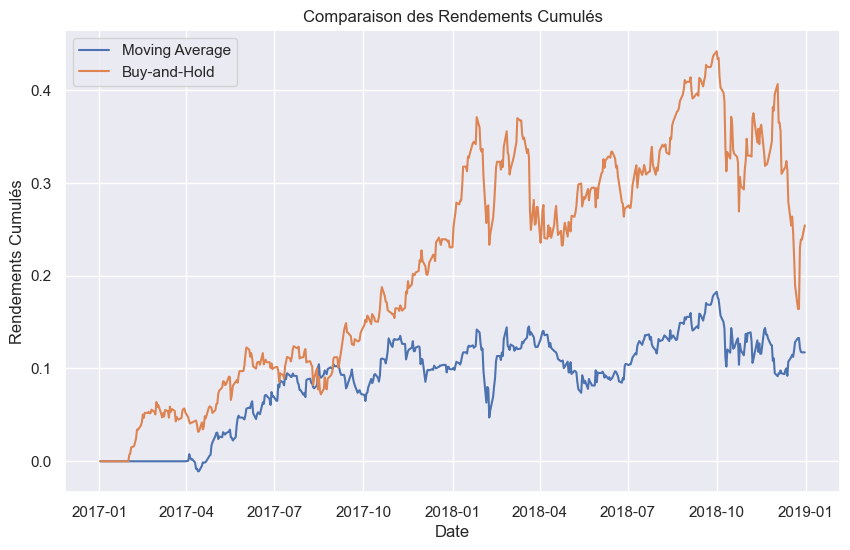

In [8]:
# Importation des modules nécessaires
from backtesting_framework.Strategies.BuyAndHold import BuyAndHold

# Définition de la stratégie Buy-and-Hold
buy_and_hold_strategy = BuyAndHold()

# Exécution du backtest pour Buy-and-Hold
buy_and_hold_result = backtester.run(buy_and_hold_strategy)

# Comparaison des deux stratégies
comparison = moving_average_result.compare(
    [buy_and_hold_result],
    strategy_names=["Moving Average", "Buy-and-Hold"]
)

In [9]:
comparison

,Strategy,Total Return,Annualized Return,Volatility,Sharpe Ratio,Max Drawdown,Max DD Recovery (days),Sortino Ratio,Calmar Ratio,Skewness,Kurtosis,Win Rate,VaR(5%),ES(5%)
0,Moving Average,0.117376,0.039165,0.099308,0.590246,-0.094763,18.0,0.477977,0.413290,-0.414461,4.520173,0.38961,-0.008567,-0.015533
1,Buy-and-Hold,0.254280,0.081582,0.153956,0.788973,-0.277787,NaN,0.623778,0.293687,-0.415703,4.840571,0.00000,-0.016829,-0.025490
